PRESTAMOS BANCARIOS
#1. Importar librerias


In [392]:
import numpy as np
import pandas as pd
import random as rd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#2. Importar dataset

In [ ]:
df_bank = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/k-means-prestamos.csv")
df_bank.head(20)

#3. Conociendo los datos

In [ ]:
df_bank.columns
df_bank.describe()
df_bank.info()
df_bank.isnull().sum()

##3.1. Limpiar datos
(text a números)

In [396]:
from sklearn import preprocessing    #clase que permite hacer ETL 
#cambiar palabbras en orden alfabetico por números Female (0), Male (1)
le =preprocessing.LabelEncoder()
#gender y self employed al ser datos mixtos se deben parsear a string para poder convertirlos en números después
df_bank['Gender']=le.fit_transform(df_bank['Gender'].astype(str))#0=female,1=male, 2=NA
df_bank['Self_Employed']=le.fit_transform(df_bank['Self_Employed'].astype(str))#0=no, 1=yes, 2=Nan
df_bank['Dependents']=le.fit_transform(df_bank['Dependents'].astype(str))
df_bank['Married']=le.fit_transform(df_bank['Married'])
df_bank['Education']=le.fit_transform(df_bank['Education'])
df_bank['Property_Area']=le.fit_transform(df_bank['Property_Area'])#0=rural, 1=semiurban, 2=urban
df_bank['Loan_Status']=le.fit_transform(df_bank['Loan_Status'])
df_bank.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
5,LP001024,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1
6,LP001027,1,1,2,0,2,2500,1840.0,109.0,360.0,1.0,2,1
7,LP001029,1,0,0,0,0,1853,2840.0,114.0,360.0,1.0,0,0
8,LP001030,1,1,2,0,0,1299,1086.0,17.0,120.0,1.0,2,1
9,LP001032,1,0,0,0,0,4950,0.0,125.0,360.0,1.0,2,1


(Llenar datos nulos)

Imputar datos a genero, self employed, dependent
Imputar datos a genero(0,1 y 2  a  0 y 1)

In [397]:
def change_data_gender(col):
  gender = col[0]
  if gender == 2:
    return df_bank['Education'].mean()
  return gender

In [398]:
df_bank['Gender'] = df_bank[['Gender', 'Education']].apply(change_data_gender, axis=1)
df_bank['Gender'] = df_bank['Gender'].astype('int')

imputar datos a self employed(0,1 y 2 a 0 y 1)

In [399]:
def change_data_self_employed(col):
  self_emp = col[0]
  if self_emp == 2:
    return df_bank['Education'].mean()
  return self_emp

In [400]:
df_bank['Self_Employed'] = df_bank[['Self_Employed', 'Education']].apply(change_data_self_employed, axis=1)
df_bank['Self_Employed'] = df_bank['Self_Employed'].astype('int')

imputar datos dependent 

In [401]:
def change_data_dependent(col):
  depen = col[0]
  if depen == 4:
    return df_bank['Education'].mean()
  return depen

In [402]:
df_bank['Dependents'] = df_bank[['Dependents', 'Education']].apply(change_data_dependent, axis=1)
df_bank['Dependents'] = df_bank['Dependents'].astype('int')

imputar datos loan amount termn

In [403]:
def change_data_loan_amount_t(col):
  lat = col[0]
  if pd.isnull(lat):
    return df_bank['Loan_Amount_Term'].mean()
  return lat

In [404]:
df_bank['Loan_Amount_Term'] = df_bank[['Loan_Amount_Term']].apply(change_data_loan_amount_t, axis=1)
df_bank['Loan_Amount_Term'] = df_bank['Loan_Amount_Term'].astype('int')

imputar datos credit_history

In [405]:
def change_data_credit_history(col):
  cr_his = col[0]
  if pd.isnull(cr_his):
    return df_bank['Credit_History'].mean()
  return cr_his

In [406]:
df_bank['Credit_History'] = df_bank[['Credit_History']].apply(change_data_credit_history, axis=1)
df_bank['Credit_History'] = df_bank['Credit_History'].astype('int')

In [ ]:
df_bank.head(20)

In [ ]:
df_bank.describe()

#4. Gráficas


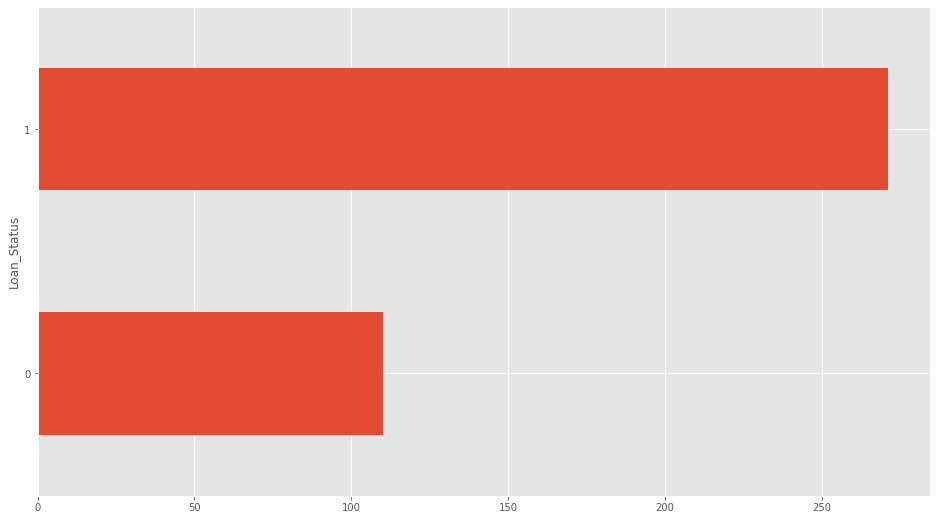

In [407]:
df_bank.groupby('Loan_Status').size().plot.barh()

#5. Separación de X y Y

In [408]:
X = np.array(df_bank[["ApplicantIncome","LoanAmount","Credit_History"]])
y = np.array(df_bank['Loan_Status'])
#forma de la matriz
X.shape

(381, 3)

#6. Encontrar clousters

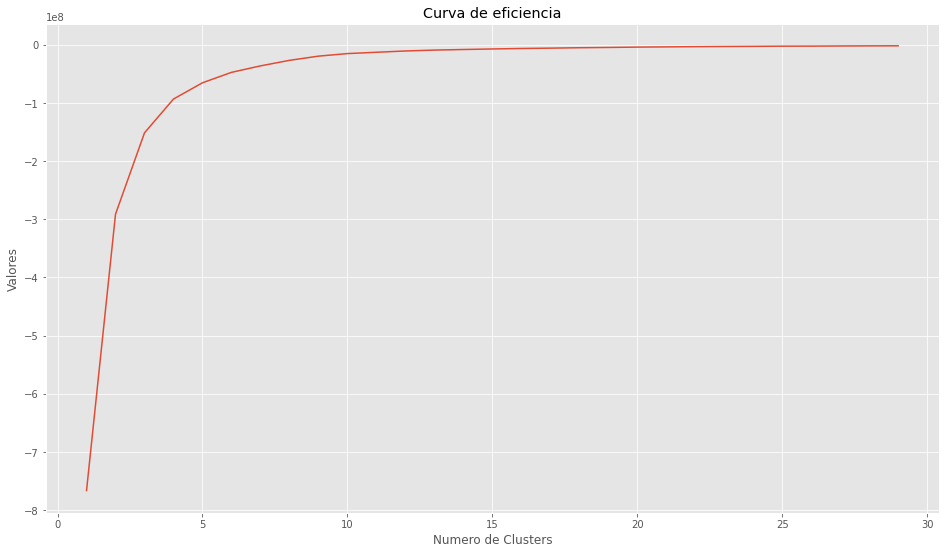

In [409]:
Nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) 
for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores')
plt.title('Curva de eficiencia')
plt.show()

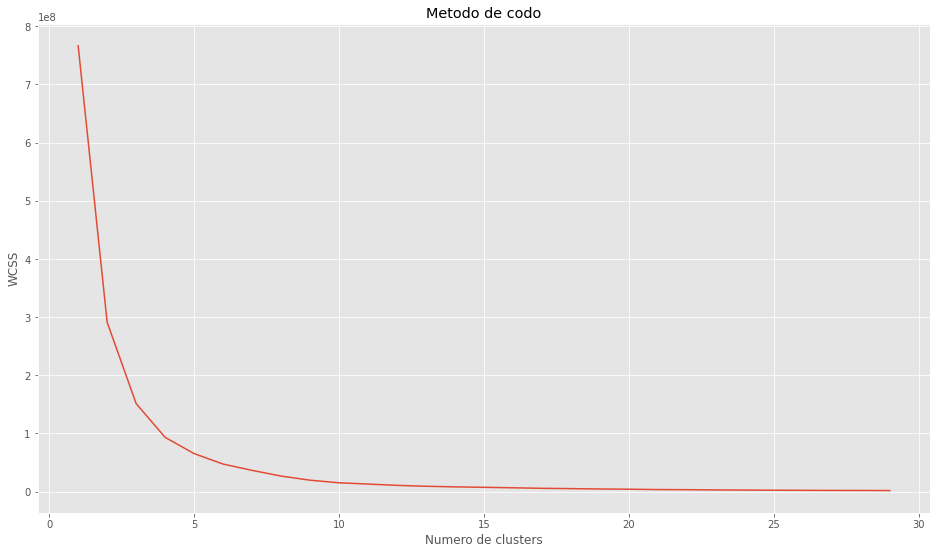

In [410]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

#7. Conocer los centroides

In [411]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_

print(centroids)


[[3.31212500e+03 1.03708333e+02 7.70833333e-01]
 [5.88790625e+03 1.20000000e+02 8.12500000e-01]
 [2.18177193e+03 9.59473684e+01 7.54385965e-01]
 [4.45850000e+03 1.12358974e+02 7.69230769e-01]
 [7.85207692e+03 1.17230769e+02 8.46153846e-01]]


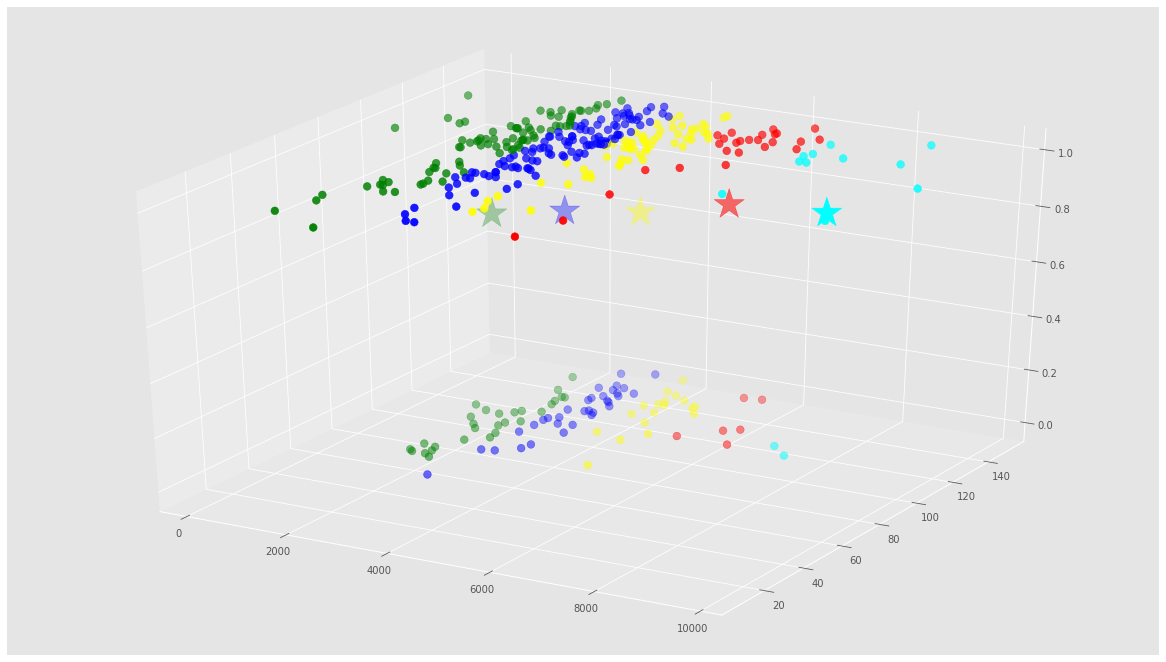

In [412]:
#3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 
#Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red','green','yellow','cyan'] #,'yellow','orange','black','pink','brown']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

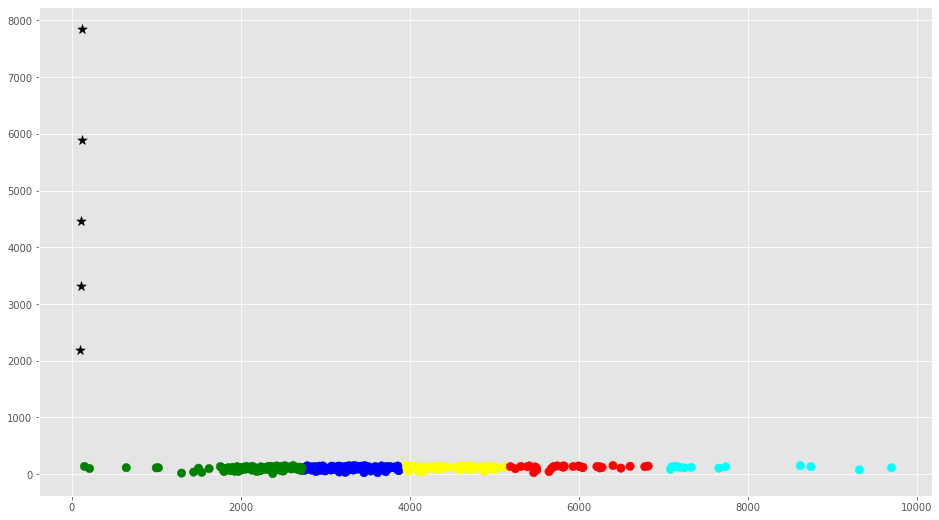

In [413]:
f1 = df_bank['ApplicantIncome'].values
f2 = df_bank['LoanAmount'].values
 
plt.scatter(f1, f2, c=asignar,s=70)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c='black', s=100)
plt.show()

In [ ]:
copy =  pd.DataFrame()
copy['usuario']=df_psico['usuario'].values
copy['categoria']=df_psico['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

In [415]:
copy =  pd.DataFrame()
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1]
diversidadGrupo['cantidad']=group_referrals.groupby('Loan_Status').size()
diversidadGrupo

KeyError: ignored